In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import pickle

from scipy.stats import bootstrap
from scipy.spatial import distance_matrix

In [6]:
with open('timesteps.txt') as f:
    for i, line in enumerate(f):
        if i%5 == 0 or i%5 == 2:
            print(line.strip('\n'))

0.072881365
0.094915259
0.161016956
0.208474591
0.252542391
0.306779675
0.345762722
0.369491541
0.383050861
0.389830522
0.361016962
0.313559337
0.272881369
0.269491541
0.264406796
0.247457644
0.242372899
0.233898318
0.191525441
0.189830524
0.15762713
0.157627136
0.167796621
0.154237303
0.122033915
0.120338997
0.113559332
0.10169493
0.089830521
0.081355944
0.074576285
0.066101721
0.072881377
0.057627138
0.05762713
0.05932205
0.049152559
0.040677974
0.042372894
0.047457632
0.047457635
0.057627127
0.047457641
0.042372897
0.027118656
0.040677983
0.047457638
0.055932209
0.047457641
0.044067806
0.033898315
0.042372885
0.0440678
0.0322034
0.0423729
0.050847474
0.071186456
0.07966103
0.108474591
0.120339
0.137288156
0.142372897
0.140677986
0.122033912
0.118644086
0.106779674
0.106779677
0.108474591
0.089830524
0.072881374
0.077966115
0.077966118
0.069491535
0.055932221
0.04576273
0.038983071
0.04067798
0.042372894
0.028813571
0.030508482
0.022033915
0.016949159
0.003389844
0.005084753


In [27]:
losses = np.array([0.489795935,
0.247175147,
0.069209042,
0.58474578,
0.779661034,
0.504237303,
0.461864419,
0.134180794,
0.474576287,
0.545197756,
0.194915259,
0.14548023,
0.043785312,
0.351694925,
0.268361589])

In [28]:
conf = bootstrap([losses], np.mean, n_resamples=9999)

In [29]:
conf

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.2521220693792958, high=0.4629508389121939), standard_error=0.05341022631884629)

In [15]:
arr1 = np.arange(10)
arr2 = np.arange(10) * 2
arr = np.stack((arr1, arr2))
arr.shape

(2, 10)

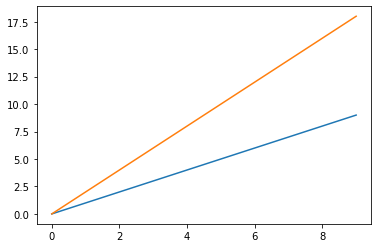

In [17]:
plt.plot(arr.T)

In [20]:
arrl = np.repeat(arr.T, 2, axis=0)

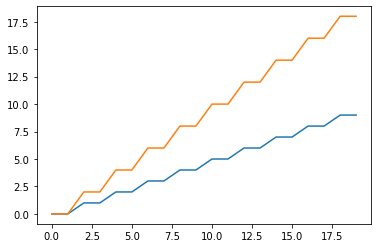

In [21]:
plt.plot(arrl)

# Visualizing PFI

In [9]:
# Load data
dataset_path = dataset_path = os.path.join('rich_data', 'subj1', 'sess3', 'task_part2_3_raw_tsss_mc.fif')
raw = mne.io.read_raw_fif(dataset_path, preload=True)

Opening raw data file rich_data/subj1/sess3/task_part2_3_raw_tsss_mc.fif...
    Range : 57000 ... 1070999 =     57.000 ...  1070.999 secs
Ready.
Reading 0 ... 1013999  =      0.000 ...  1013.999 secs...


/var/folders/nv/wjmf18wd5_j38vg9v0cthl5h0000gn/T/ipykernel_2923/3861472975.py:3: RuntimeWarning: This filename (rich_data/subj1/sess3/task_part2_3_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(dataset_path, preload=True)


In [54]:
raw = raw.pick('grad')

In [10]:
grads = []
for i in range(102):
    grads.append(raw.info['chs'][i*2]['loc'][:3])

grads = np.array(grads)    
dist_matrix = distance_matrix(grads, grads)

In [11]:
closest_k = []
k = 1
for i in range(102):
    idx = np.argpartition(dist_matrix[i], k)
    closest_k.append(idx[:k])

In [12]:
with open('cichy_data/subj0/grad_closest' + str(k), 'wb') as f:
    pickle.dump(closest_k, f)

In [23]:
channels = []
with open('cichy_data/subj0/PFIch_inverse/val_loss_PFIch20.txt') as f:
    for i, line in enumerate(f):
        if i==0:
            val = float(line.strip())
        else:
            channels.append(float(line.strip()))

In [17]:
channels = val - np.array(channels)

In [9]:
channels = [v for i, v in enumerate(channels) if i%3]

In [37]:
channels = np.array([1] * 102)
channels[list(closest_k[100])] = 0

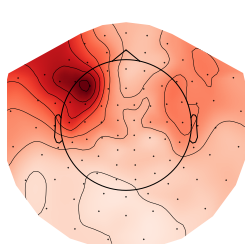

(<matplotlib.image.AxesImage at 0x7fbc00cf86d0>,
 <matplotlib.contour.QuadContourSet at 0x7fbc00cf8a30>)

In [24]:
chn_type = 'mag'
raw = raw.pick(chn_type)
mne.viz.plot_topomap(channels, raw.info, ch_type=chn_type)

In [22]:
a = np.arange(306)
a[~np.array([0,4,5,60])]

array([305, 301, 300, 245])